In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


Abre o dataset Fashion_MNIST e separa em uma parcela para treino e outra para teste.

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorando os dados

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

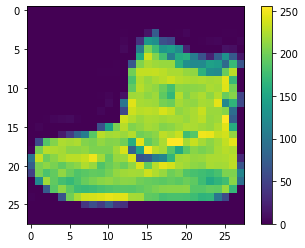

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

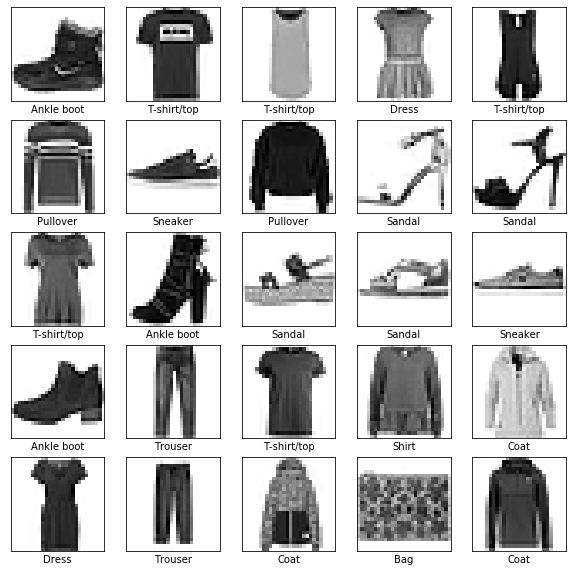

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Montando o modelo

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4992 - accuracy: 0.8254
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3765 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3368 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3130 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2940 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2808 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2663 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2576 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2475 - accuracy: 0.9073
Epoch 10/10
60

In [32]:
tes_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2112 - accuracy: 0.8751


In [34]:
predictions = model.predict(test_images)
predictions[0]

array([8.0974614e-06, 9.6533913e-11, 4.3173172e-09, 4.0822318e-13,
       2.3964847e-10, 1.4474484e-03, 2.7681074e-07, 1.1219489e-02,
       8.2651098e-08, 9.8732460e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

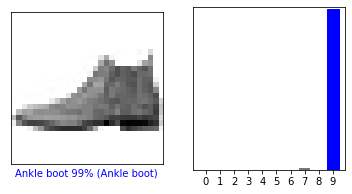

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

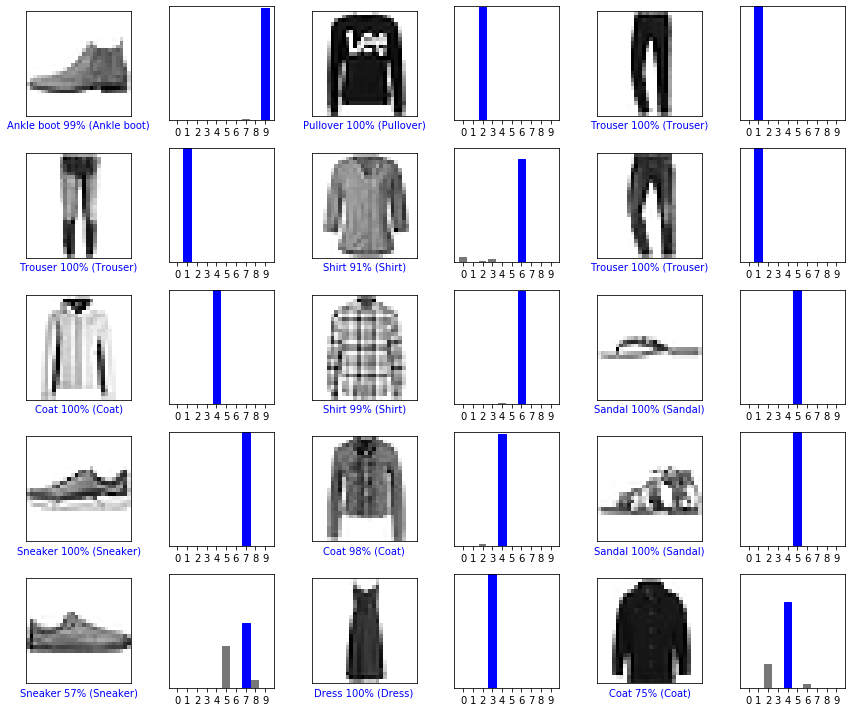

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [40]:
img = test_images[1]
print(img.shape)

(28, 28)


In [41]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = model.predict(img)
print(predictions_single)

[[4.9159059e-04 4.0620719e-12 9.9620795e-01 4.3787871e-09 2.7518002e-03
  1.3902087e-09 5.4865872e-04 3.7941289e-14 9.8338482e-10 4.5582940e-16]]


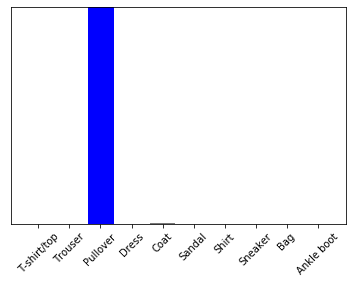

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

2